


# TITLE: CRYPTOCURRENCY TRADE ALGORITHM USING PYTHON








# NAME: JUDE TOCHUKWU OGBOZOR









# DATE: 23RD MAY, 2021


### INTRODUCTION:

The prominence of Cryptocurrencies as a means of transaction and investment vehicle has seen astronomical growth in recent years - but what is it and how is it different than the traditional currencies we're used to? The currencies you are familar with and likely use on a day-to-day basis, such as the US Dollar,Euro and Naira, are known as *fiat currencies*. They are issued by the government and there exists a central authority, such as a central bank, to regulate and govern it's use. In stark contrast, a defining feature of a *Cryptocurrency* is that there is no central regulatory authority. Instead, transactions are held in a ledger or database which is secured cryptographically. Both types of currencies have their advantages and disadvantages.

While this is all interesting, the most important question you might be asking is "what's in it for me?" As an individual investor, you may find success in trading Cryptocurrencies to take home a profit - but unfortunately, that often involves a significant time investment, tracking charts and prices to determine what the next trade to make is. If that sounds appealing, then by all means, enjoy! It is certainly a viable option.

If, however, you prefer a little more of a hands-off approach, a trading algorithm may be here to save the day. Algorithmic trading is a way to automate making decisions on when to buy or sell an asset based on some pre-programmed instructions and criteria. You design and implement a trading strategy and let the computer do the work for you! If the strategy is effective and well-tested, then you can potentially earn money while you sleep without having to spend hours staring at charts.

### OBJECTIVE:

*   Fetch Cryptocurrency market prices and data
*   Perform basic analysis of market behaviour
*   Implement a simple algorithmic trading strategy
*   Analyze the performance of the trading algorithm

In [1]:
# The crytocurrency market data has yahoo finance in python library

!pip install yfinance

You should consider upgrading via the 'C:\Users\Tobechukwu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## METHODOLOGY

In [2]:
# install other important analysis python library

!pip install pandas
!pip install numpy
!pip install matplotlib

You should consider upgrading via the 'C:\Users\Tobechukwu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Tobechukwu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Tobechukwu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
# import the libraries

import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [4]:
# Retrive a month of BTC to USD exchange rate with an hour interval and save the dataset to a variable

BTC_USD=yf.download("BTC-USD", start="2021-01-01", end="2021-01-31", interval="1h")

[*********************100%***********************]  1 of 1 completed


In [5]:
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume
2020-12-31 23:00:00+00:00,29116.205078,29116.205078,28874.992188,29010.906250,29010.906250,0
2021-01-01 00:00:00+00:00,28994.009766,29033.222656,28803.585938,29032.312500,29032.312500,0
2021-01-01 01:00:00+00:00,29027.828125,29458.738281,29027.828125,29411.566406,29411.566406,77246464
2021-01-01 02:00:00+00:00,29410.250000,29451.232422,29228.302734,29228.789062,29228.789062,250859520
2021-01-01 03:00:00+00:00,29229.537109,29335.023438,29226.875000,29330.333984,29330.333984,0


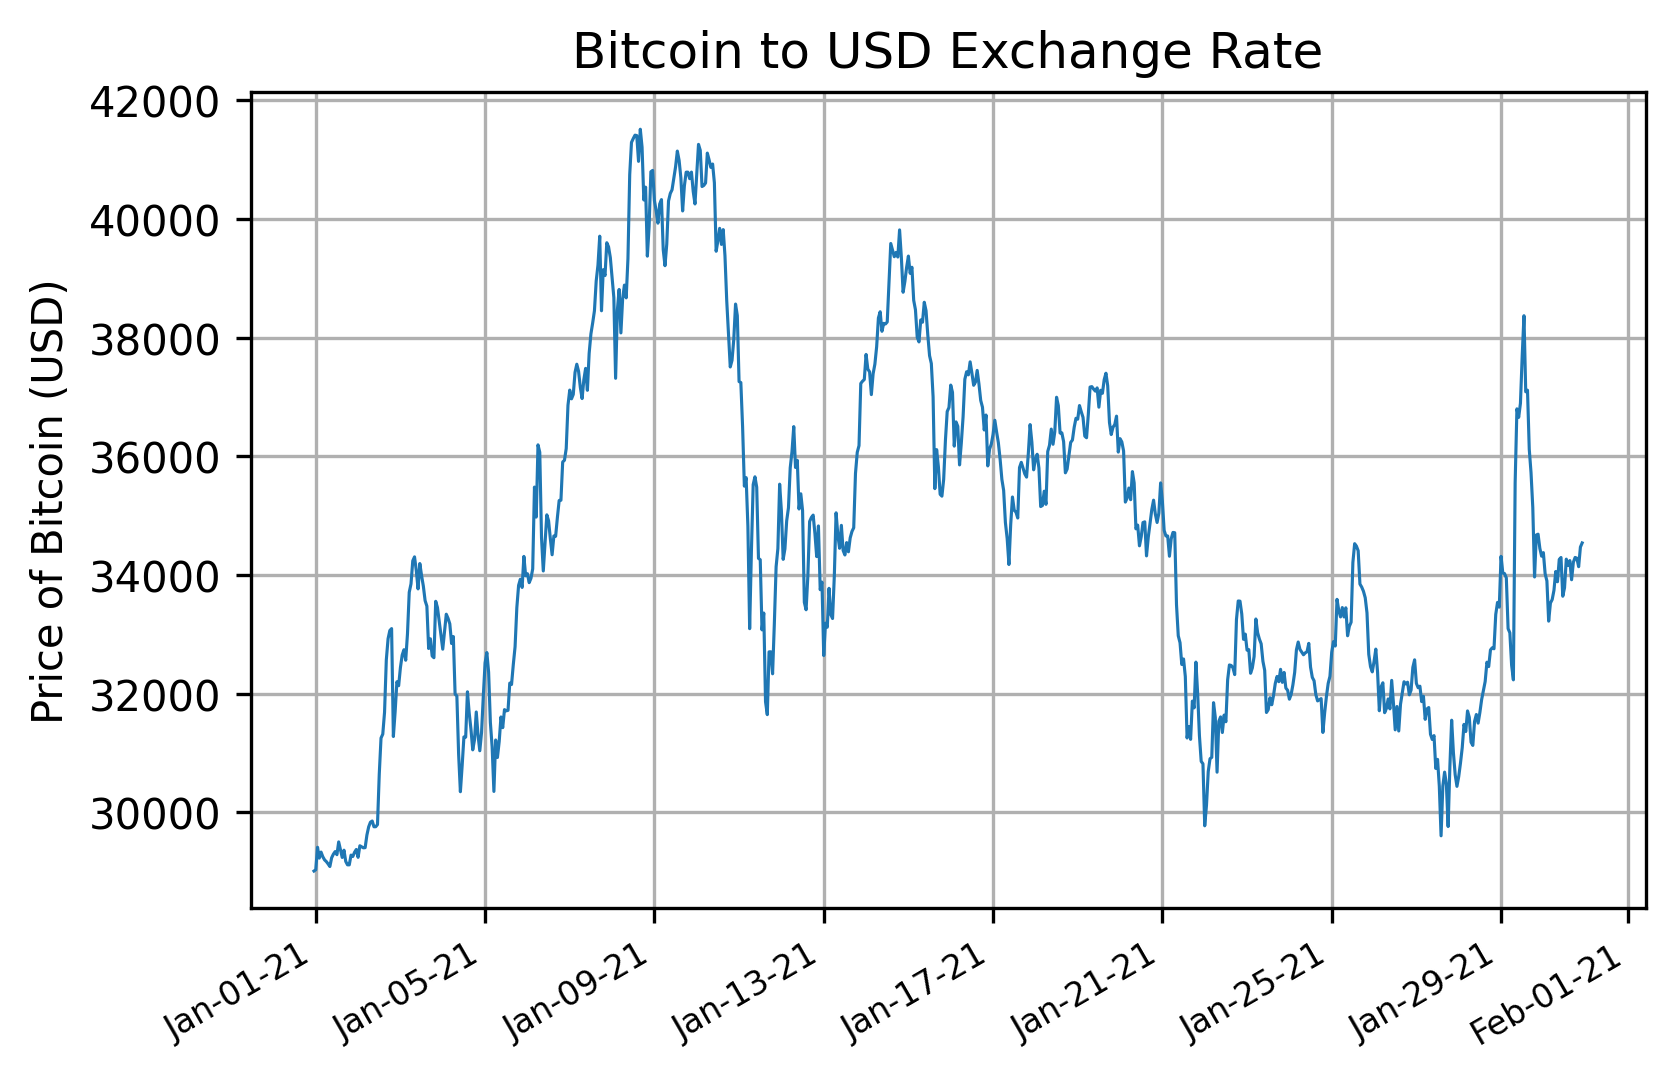

In [6]:
# Creating Price Chart to understand how the prices behave

fig, ax = plt.subplots(dpi=300)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart
plt.show()

### MOVING AVERAGE

A moving average seeks to identify the market's trend by calculating an average of the market's price over recent periods. By looking at the market's price over the past n periods, the moving average smooths out the market's price and cuts down on noise by ignoring day-to-day market fluctuations.

The simple moving average(SMA) = (sum of the market's price over the past n periods) / (number of periods). Due to the way it's calculated, the simple moving average puts equal emphasis on every n period's price. "N periods" can be anything.

In [7]:
# let`s calculate the SMA for 12 hrs, 24 hrs and add as a column

BTC_USD["SMA-12"]=BTC_USD["Close"].rolling(window=12,min_periods=1).mean()
BTC_USD["SMA-24"]=BTC_USD["Close"].rolling(window=24, min_periods=1).mean()

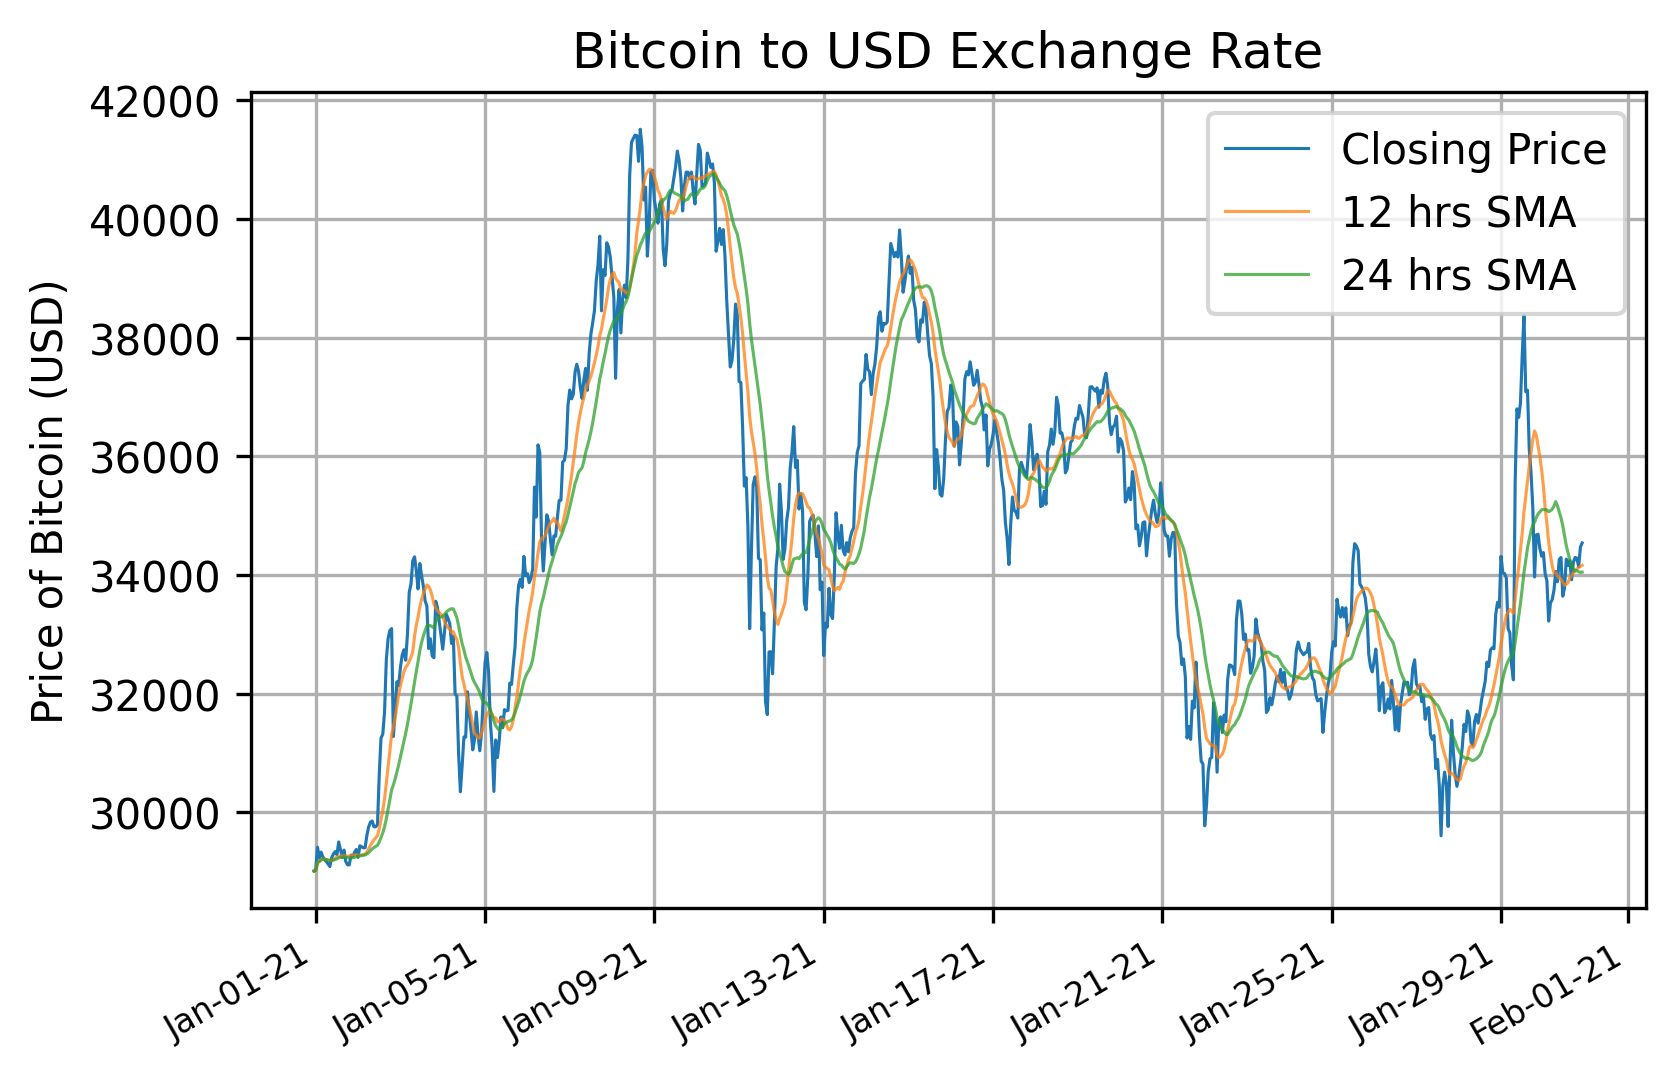

In [8]:
#plot the SMA-12 and SMA-24 to observe the trend changes

fig, ax = plt.subplots(dpi=300)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 hr interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

ax.plot(BTC_USD['SMA-12'], lw=0.75, alpha=0.75, label='12 hrs SMA')
ax.plot(BTC_USD['SMA-24'], lw=0.75, alpha=0.75, label='24 hrs SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

## RESULTS

From the plot you can see that the Simple Moving Averages had a smoothing effect on the line chart - much of the short term Bitcoin price fluctuations were smoothed out and the moving averages appear to reveal some longer term trends. As expected, the 24 hrs interval had a more significant smoothing effect than the 12 hrs interval.


### Trading Strategy (Moving Average Crossover):

The basic idea behind this strategy is to use two Simple Moving Averages - one with a relatively short sampling interval and the other with a longer interval. When the shorter moving average crosses over the longer interval moving average, it can signal a reversal in trend. For example, if the shorter term moving average is below the longer moving average but then crosses over to the top of it, this may signal the beginning of an upwards (bullish) trend. Using the *Moving Average Crossover* strategy, this would be a *buy* signal. Similarily, when the shorter moving average is above the longer interval one and it crosses under, this could signal a downward (bearish) trend, which would be a *sell* signal in this strategy.

In [9]:
# creating a dataframe for the trading signal

trading_signal=pd.DataFrame(index=BTC_USD.index)

# create variable for short and long interval
short_interval=12
long_interval=36

# compute the SMA for both intervals and add it to dataframe as new columns

trading_signal["Short"]=BTC_USD["Close"].rolling(window=short_interval, min_periods=1).mean()
trading_signal["Long"]=BTC_USD["Close"].rolling(window=long_interval, min_periods=1).mean()

In [10]:
# lets create a kind of binary signal of yes and no

trading_signal["Signals"]=0

#whereever the shorter term SMA is above than the longer term SMA set signal column to 1 otherwise, set to 0

trading_signal["Signals"]=np.where(trading_signal["Short"]>trading_signal["Long"],1.0,0.0)

The two lines of code executed above give us a column called `Signal`. At every date where the short-term moving average is above the long-term moving average for at least a period of time equal to `short_interval`, the value is 1.0 and 0.0 elsewhere.

According to our *Moving Average Crossover* strategy, we want to buy when the short-term SMA crosses the long-term SMA from below, and sell when it crosses over from above. We can easily use the `Signal` column in the `trade_signals` dataframe to determine where exactly these events occur. If the `Signal` column has value 0.0 on a given date then switches to 1.0, this means the short-term SMA crossed the long-term SMA from *below* - this is our time to **buy** Bitcoin according to our strategy. On the other hand, if the value goes from 1.0 to 0.0, that tells us the short-term SMA was *above* the long-term SMA and then crossed over - this is our time to **sell**.

In [11]:
# write a code to know the position to buy or sell

trading_signal["position"]=trading_signal["Signals"].diff()

In [12]:
trading_signal.tail()

,Short,Long,Signals,position
2021-01-30 18:00:00+00:00,34087.144531,34803.689779,0.0,0.0
2021-01-30 19:00:00+00:00,34105.844401,34860.663628,0.0,0.0
2021-01-30 20:00:00+00:00,34126.994792,34821.338216,0.0,0.0
2021-01-30 21:00:00+00:00,34144.348307,34756.613824,0.0,0.0
2021-01-30 22:00:00+00:00,34164.816732,34697.819661,0.0,0.0


Let's make a plot to visualize the algorithm's trades before going into more detail and analyzing its performance quantiatively. We are to plot the closing price and the two Simple Moving Averages computed as part of the trading strategy. Furthermore, where the trading algorithm decides to make a **buy** order, we will plot an upwards facing green arrow. Where the algorithm places a **sell** order, we will plot a downwards facing red arrow.

## DISCUSSION

We are easily see from the below graph the suggested time to buy and sell. This is the major purpose of this project. It will help to make more informed decisions in your trading. This project however is not a financial advice.

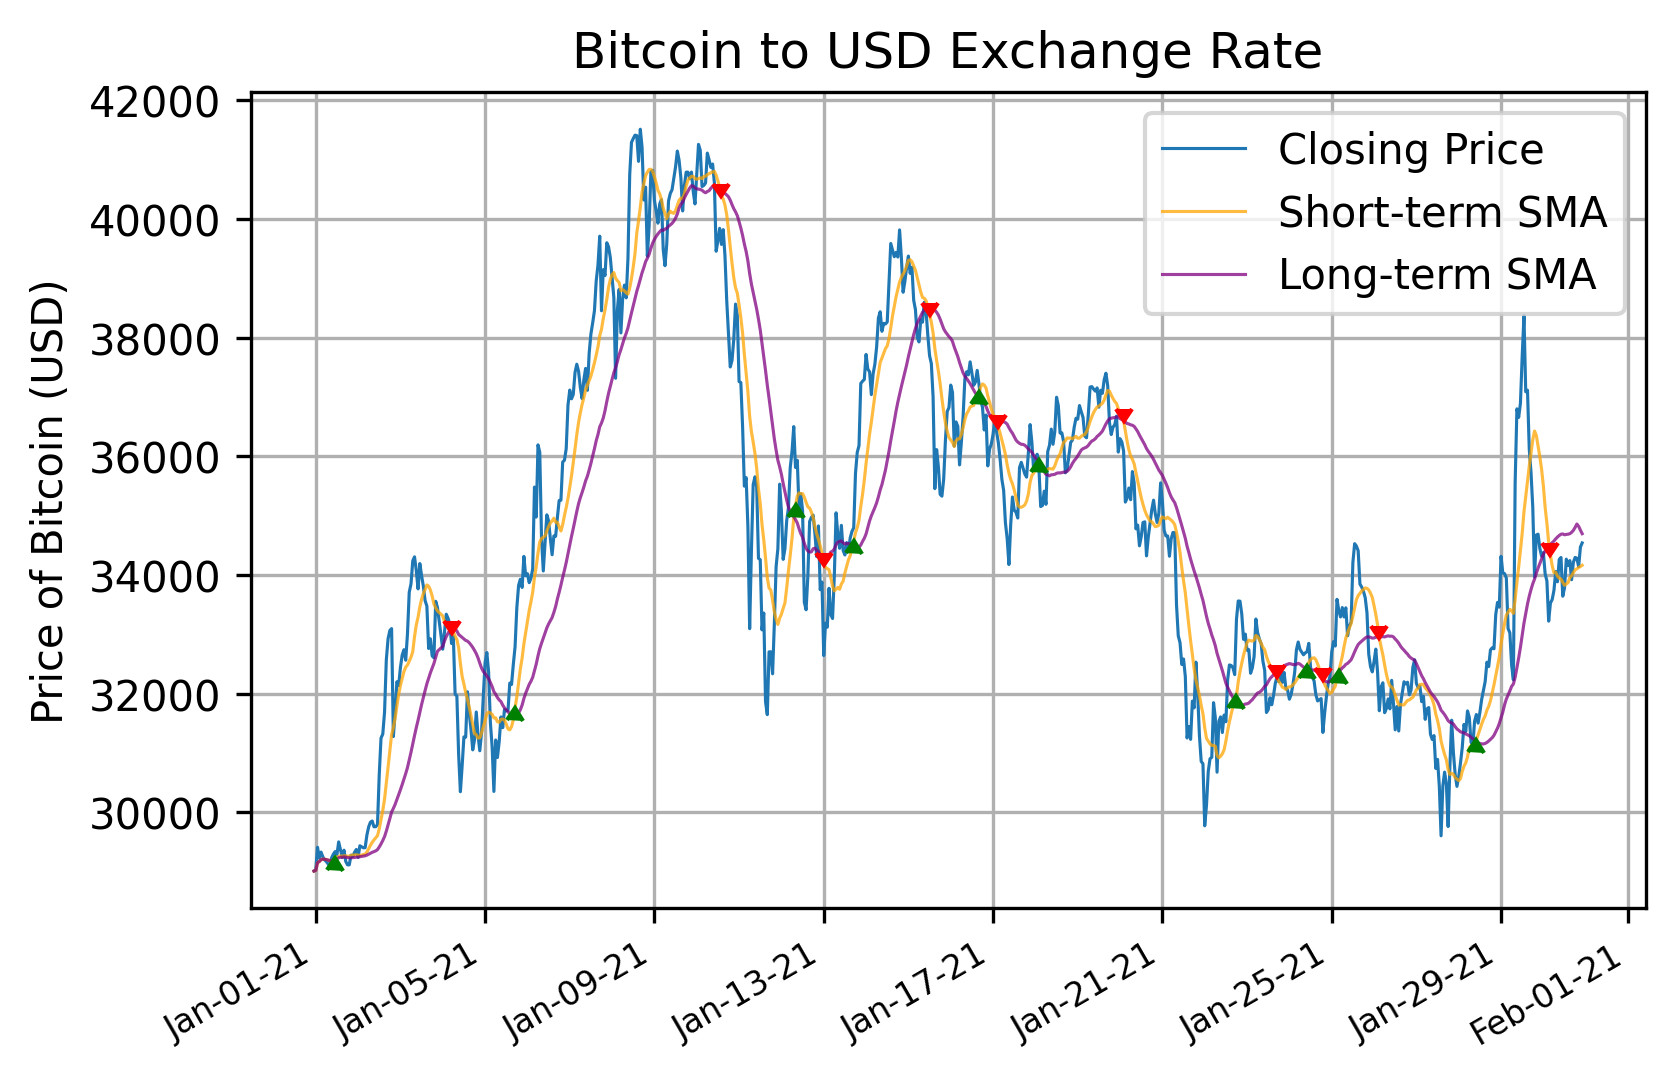

In [13]:
fig, ax = plt.subplots(dpi=300)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trading_signal['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trading_signal['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trading_signal.loc[trading_signal['position']==1.0].index, trading_signal.Short[trading_signal['position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trading_signal.loc[trading_signal['position'] == -1.0].index, trading_signal.Short[trading_signal['position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

## Backtesting
Backtesting is a term used in modeling to refer to testing a predictive model on historical data. Backtesting is a type of retrodiction, and a special type of cross-validation applied to previous time period(s).
Trading strategy backtesting plays an important part in developing your trading strategy. However, backtesting is just the start because the immediate step is to forward test your strategy. The primary purpose of backtesting is to prove you have valid trade ideas. (https://tradingstrategyguides.com/how-to-backtest-a-trading-strategy/#:~:text=Trading%20strategy%20backtesting%20plays%20an%20important%20part%20in,is%20to%20prove%20you%20have%20valid%20trade%20ideas.)

In [14]:
# starting a backtest

initial_balance =10000 #we are starting trading with 10,000 USD

#creating a dataframe to test all the dates under consideration

back_test =pd.DataFrame(index=trading_signal.index)

#add column showing the daily return of BTC

back_test["return"]=BTC_USD["Close"]/BTC_USD["Close"].shift(1) #current closing price/yesterday closing price

Now to compute the daily returns of the trading algorithm, let's assume that at any given point, our portfolio is either all in on Bitcoin or is entirely holding USD. This means that whenever the algorithm is currently holding Bitcoin, it's daily returns are the same as the daily returns of Bitcoin. On the other hand, when the algorithm is holding USD, its returns are entirely detached from Bitcoin price movements. Thus when holding USD, the value of the portfolio remains constant during that period. We will also make the simplifying assumption that we are able to perform zero comission trades. This reasoning is condensed into the following two lines of code.


## CONCLUSION

If you are interested in the cryptocurrency market, chances are you're interested in making a profit. As you're likely well aware, the general principle is to buy an asset at a low price, then sell it at a higher price and pocket the difference. The tricky part is that unless you can see the future (in which case, call us), it's not easy to know which direction the price will move after you buy it. Fortunately, we can try to improve our chances of making a good trade beyond blind luck by sticking to a trading strategy. A great number of trading strategies exist with varying levels of complexity we just looked at just one type.
